## Africa Food Production and Supply (2004 - 2013)

In [2]:
# Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#### Importing Food Production dataset and Food Supply dataset

In [3]:
food_prod = pd.read_csv('Africa Food Production (2004 - 2013).csv')
food_prod.head()

Country                Item  Year  Value
0  Algeria  Wheat and products  2004   2731
1  Algeria  Wheat and products  2005   2415
2  Algeria  Wheat and products  2006   2688
3  Algeria  Wheat and products  2007   2319
4  Algeria  Wheat and products  2008   1111

In [4]:
food_supply = pd.read_csv("Africa Food Supply (2004 - 2013).csv")
food_supply.head()

Country  Year  Value
0  Algeria  2004   2987
1  Algeria  2005   2958
2  Algeria  2006   3047
3  Algeria  2007   3041
4  Algeria  2008   3048

### Assessing the Data

In [5]:
food_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


In [6]:
food_supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB


In [7]:
food_prod.describe()

Year         Value
count  23110.000000  23110.000000
mean    2008.498269    327.785201
std        2.871740   1607.940343
min     2004.000000      0.000000
25%     2006.000000      3.000000
50%     2008.000000     18.000000
75%     2011.000000    108.000000
max     2013.000000  54000.000000

In [8]:
food_supply.describe()

Year        Value
count   450.000000   450.000000
mean   2008.500000  2469.775556
std       2.875478   379.140143
min    2004.000000  1781.000000
25%    2006.000000  2174.000000
50%    2008.500000  2376.000000
75%    2011.000000  2681.750000
max    2013.000000  3561.000000

In [9]:
food_prod.isnull().sum()

Country    0
Item       0
Year       0
Value      0
dtype: int64

In [10]:
food_supply.isnull().sum()

Country    0
Year       0
Value      0
dtype: int64

In [11]:
food_prod.duplicated().sum()

0

In [12]:
food_supply.duplicated().sum()

0

### converting the year columns in the datasets to datetime

In [13]:
food_prod['Year'] = food_prod['Year'].apply(lambda x: pd.to_datetime(str(x), format='%Y'))

In [14]:
food_supply['Year'] = food_supply['Year'].apply(lambda x: pd.to_datetime(str(x), format='%Y')) 

### Creating a column in the datasets containing the kilotone symbol which is the unit of the Value column 

In [15]:
food_prod['Unit'] = 'kt'
food_prod.head

<bound method NDFrame.head of         Country                Item       Year  Value Unit
0       Algeria  Wheat and products 2004-01-01   2731   kt
1       Algeria  Wheat and products 2005-01-01   2415   kt
2       Algeria  Wheat and products 2006-01-01   2688   kt
3       Algeria  Wheat and products 2007-01-01   2319   kt
4       Algeria  Wheat and products 2008-01-01   1111   kt
...         ...                 ...        ...    ...  ...
23105  Zimbabwe         Crustaceans 2009-01-01      0   kt
23106  Zimbabwe         Crustaceans 2010-01-01      0   kt
23107  Zimbabwe         Crustaceans 2011-01-01      0   kt
23108  Zimbabwe         Crustaceans 2012-01-01      0   kt
23109  Zimbabwe         Crustaceans 2013-01-01      0   kt

[23110 rows x 5 columns]>

In [16]:
food_prod

Country                Item       Year  Value Unit
0       Algeria  Wheat and products 2004-01-01   2731   kt
1       Algeria  Wheat and products 2005-01-01   2415   kt
2       Algeria  Wheat and products 2006-01-01   2688   kt
3       Algeria  Wheat and products 2007-01-01   2319   kt
4       Algeria  Wheat and products 2008-01-01   1111   kt
...         ...                 ...        ...    ...  ...
23105  Zimbabwe         Crustaceans 2009-01-01      0   kt
23106  Zimbabwe         Crustaceans 2010-01-01      0   kt
23107  Zimbabwe         Crustaceans 2011-01-01      0   kt
23108  Zimbabwe         Crustaceans 2012-01-01      0   kt
23109  Zimbabwe         Crustaceans 2013-01-01      0   kt

[23110 rows x 5 columns]

In [17]:
food_supply['Unit'] = 'kt'
food_supply.head

<bound method NDFrame.head of       Country       Year  Value Unit
0     Algeria 2004-01-01   2987   kt
1     Algeria 2005-01-01   2958   kt
2     Algeria 2006-01-01   3047   kt
3     Algeria 2007-01-01   3041   kt
4     Algeria 2008-01-01   3048   kt
..        ...        ...    ...  ...
445  Zimbabwe 2009-01-01   2147   kt
446  Zimbabwe 2010-01-01   2168   kt
447  Zimbabwe 2011-01-01   2200   kt
448  Zimbabwe 2012-01-01   2197   kt
449  Zimbabwe 2013-01-01   2110   kt

[450 rows x 4 columns]>

In [18]:
food_supply

Country       Year  Value Unit
0     Algeria 2004-01-01   2987   kt
1     Algeria 2005-01-01   2958   kt
2     Algeria 2006-01-01   3047   kt
3     Algeria 2007-01-01   3041   kt
4     Algeria 2008-01-01   3048   kt
..        ...        ...    ...  ...
445  Zimbabwe 2009-01-01   2147   kt
446  Zimbabwe 2010-01-01   2168   kt
447  Zimbabwe 2011-01-01   2200   kt
448  Zimbabwe 2012-01-01   2197   kt
449  Zimbabwe 2013-01-01   2110   kt

[450 rows x 4 columns]

## Data Analysis

### Food Production

In [19]:
#creating a new dataframe called country_prod containing the production value for each country using the groupby() method
country_prod= pd.DataFrame(food_prod.groupby('Country')['Value'].sum()).reset_index(inplace=False) 
country_prod

Country    Value
0                       Algeria   188650
1                        Angola   195499
2                         Benin    88072
3                      Botswana     4808
4                  Burkina Faso   100129
5                    Cabo Verde     1658
6                      Cameroon   197670
7      Central African Republic    24921
8                          Chad    45078
9                         Congo    25791
10                Cote d'Ivoire   182486
11                     Djibouti      666
12                        Egypt   877498
13                     Ethiopia   350693
14                        Gabon    13566
15                       Gambia     4699
16                        Ghana   295004
17                       Guinea    66848
18                Guinea-Bissau     7296
19                        Kenya   256872
20                      Lesotho     3785
21                      Liberia    14657
22                   Madagascar   133071
23                       Malawi   153717
24                         Mali    92292
25                   Mauritania    10039
26                    Mauritius    51785
27                      Morocco   271821
28                   Mozambique   157584
29                      Namibia    14197
30                        Niger    86808
31                      Nigeria  1628030
32                       Rwanda    95174
33        Sao Tome and Principe     1152
34                      Senegal    49414
35                 Sierra Leone    47737
36                 South Africa   579592
37                        Sudan   301584
38                    Swaziland    62665
39                         Togo    32155
40                      Tunisia    92713
41                       Uganda   278421
42  United Republic of Tanzania   332802
43                       Zambia    82701
44                     Zimbabwe    73316

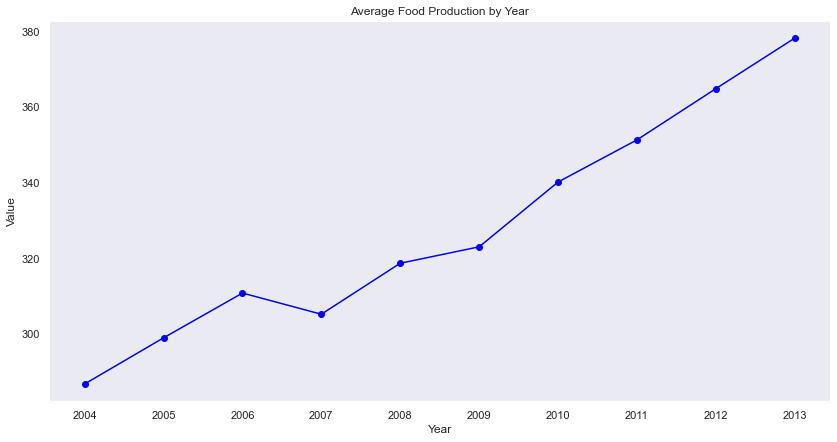

In [65]:
#plotting line chart to show trend of food production from 2004-2013
fig= plt.figure(figsize=(14, 7))
fig.savefig('Average Food Production.png') 
plt.plot(food_prod.groupby('Year')['Value'].mean(), marker='o', color='blue')
plt.title('Average Food Production by Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid()
plt.show()

From the line plot above, it can be seen that food production increased significantly from 2004 - 2013

In [23]:
# To visualize the average food production by country, lets sort the food_prod dataset in descending order

food_prod_sorted_desc= food_prod.sort_values('Value',ascending=False)

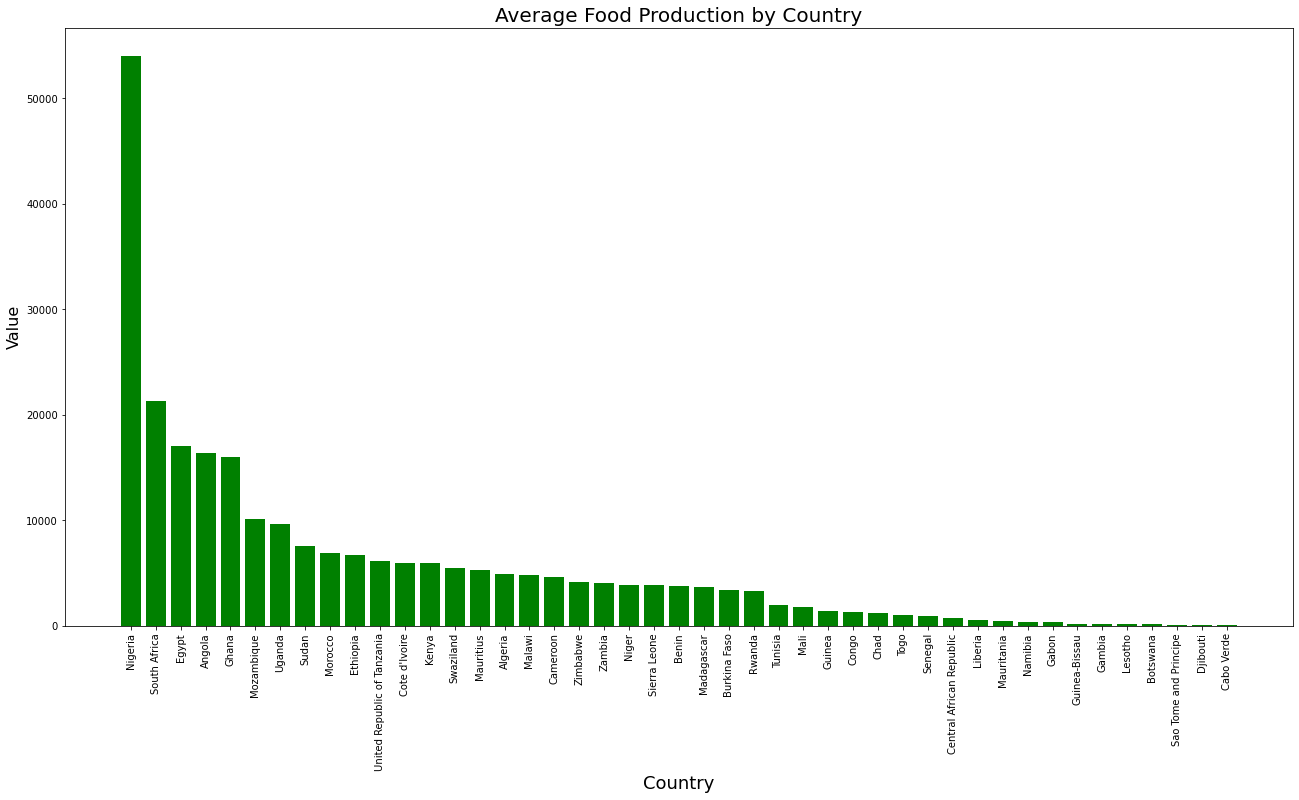

In [25]:
#We will use a bar chart to show the production value by country to know the heightest producing country
# Set the figsize to (22,11)
fig= plt.figure(figsize=(22, 11))
fig.savefig('Average Food Production by country.png')
plt.bar(food_prod_sorted_desc['Country'],food_prod_sorted_desc['Value'],color='green')
plt.title('Average Food Production by Country', fontsize= 20)
plt.xlabel('Country', fontsize= 18)
plt.ylabel('Value', fontsize= 16)
plt.xticks(rotation=90)
plt.show()

#### From the Bar Chart above, Nigeria is the highest producing Country

## Items(food crops) produced in Nigeria

In [26]:
# Perform a groupby function on item name it byItem

byItem= pd.DataFrame(food_prod.groupby('Item')['Value'].mean()).reset_index(inplace=False)
byItem.head(3)

Item      Value
0        Alcohol, Non-Food   45.65000
1      Apples and products  271.32500
2  Aquatic Animals, Others    0.08125

In [27]:
# sorting byItem in decending order
item_sorted= byItem.sort_values('Value', ascending=False)

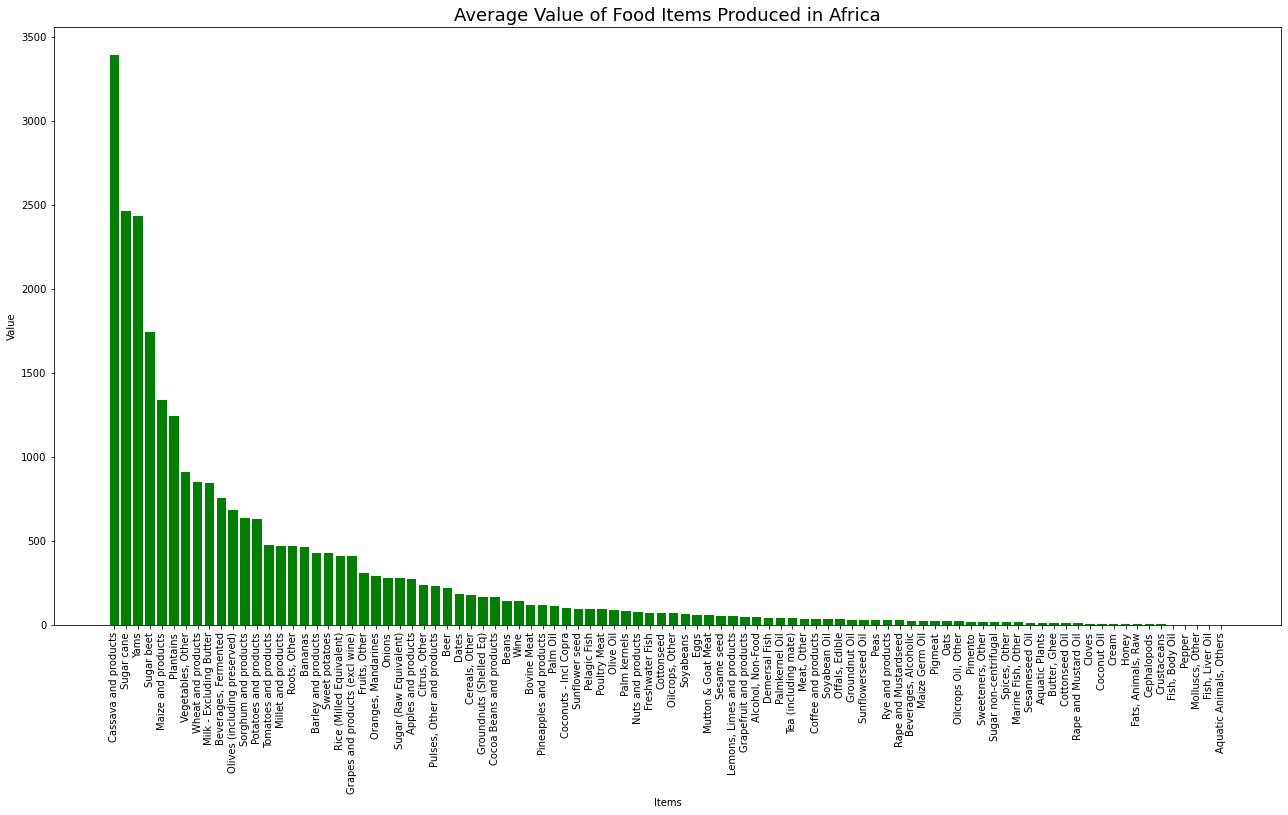

In [28]:
# Using a bar chart to plot the average value of food item, figsize is set to (22,11)
fig= plt.figure(figsize=(22,11))
plt.bar('Item', 'Value',data=item_sorted, color = 'green')
plt.xlabel("Items")
plt.ylabel("Value")
plt.xticks(rotation=90)
plt.title("Average Value of Food Items Produced in Africa", size=18)
plt.show()
fig.savefig('Food Produced in Africa.jpg')

## Food Supply

In [29]:
#creating a dataframe called country_supply containing the value of supply for each country using the groupby() method
country_supply= pd.DataFrame(food_supply.groupby('Country')['Value'].sum()).reset_index(inplace=False)
country_supply

Country  Value
0                       Algeria  31118
1                        Angola  22556
2                         Benin  25378
3                      Botswana  22263
4                  Burkina Faso  26072
5                    Cabo Verde  25514
6                      Cameroon  24603
7      Central African Republic  20719
8                          Chad  20511
9                         Congo  21530
10                Cote d'Ivoire  27666
11                     Djibouti  24165
12                        Egypt  34580
13                     Ethiopia  20292
14                        Gabon  27299
15                       Gambia  25695
16                        Ghana  29180
17                       Guinea  25180
18                Guinea-Bissau  22963
19                        Kenya  21453
20                      Lesotho  25588
21                      Liberia  21827
22                   Madagascar  20608
23                       Malawi  22925
24                         Mali  27502
25                   Mauritania  27443
26                    Mauritius  30543
27                      Morocco  32967
28                   Mozambique  21702
29                      Namibia  21602
30                        Niger  25024
31                      Nigeria  26988
32                       Rwanda  21309
33        Sao Tome and Principe  24462
34                      Senegal  23784
35                 Sierra Leone  22291
36                 South Africa  29629
37                        Sudan  23238
38                    Swaziland  23171
39                         Togo  23339
40                      Tunisia  33055
41                       Uganda  22205
42  United Republic of Tanzania  21550
43                       Zambia  18701
44                     Zimbabwe  21209

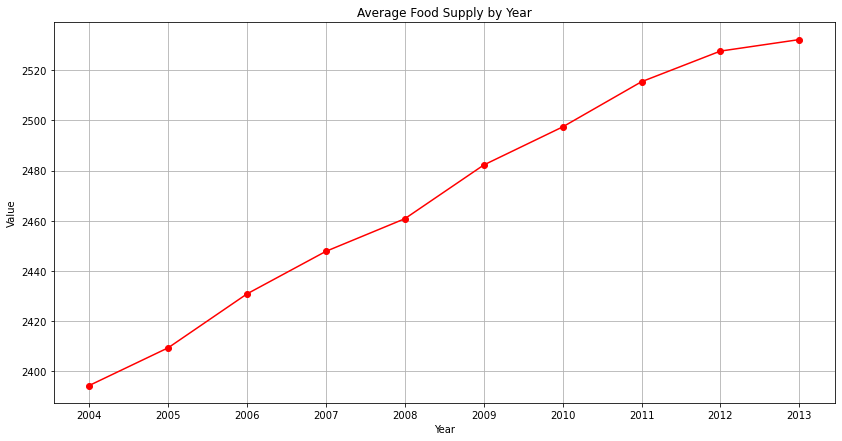

In [30]:
#plotting line chart to show trend of food suuply from 2004-2013, seeting figsize to (14,7)
fig= plt.figure(figsize=(14, 7))
plt.plot(food_supply.groupby('Year')['Value'].mean(), marker='o', color='red')
plt.title('Average Food Supply by Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid()
plt.show()
fig.savefig('Average Food supply.png')

In [31]:
# To visualize the average food supply by country, lets sort the food_supply dataset in descending order
food_supply_sorted_desc= food_supply.sort_values('Value',ascending=False)

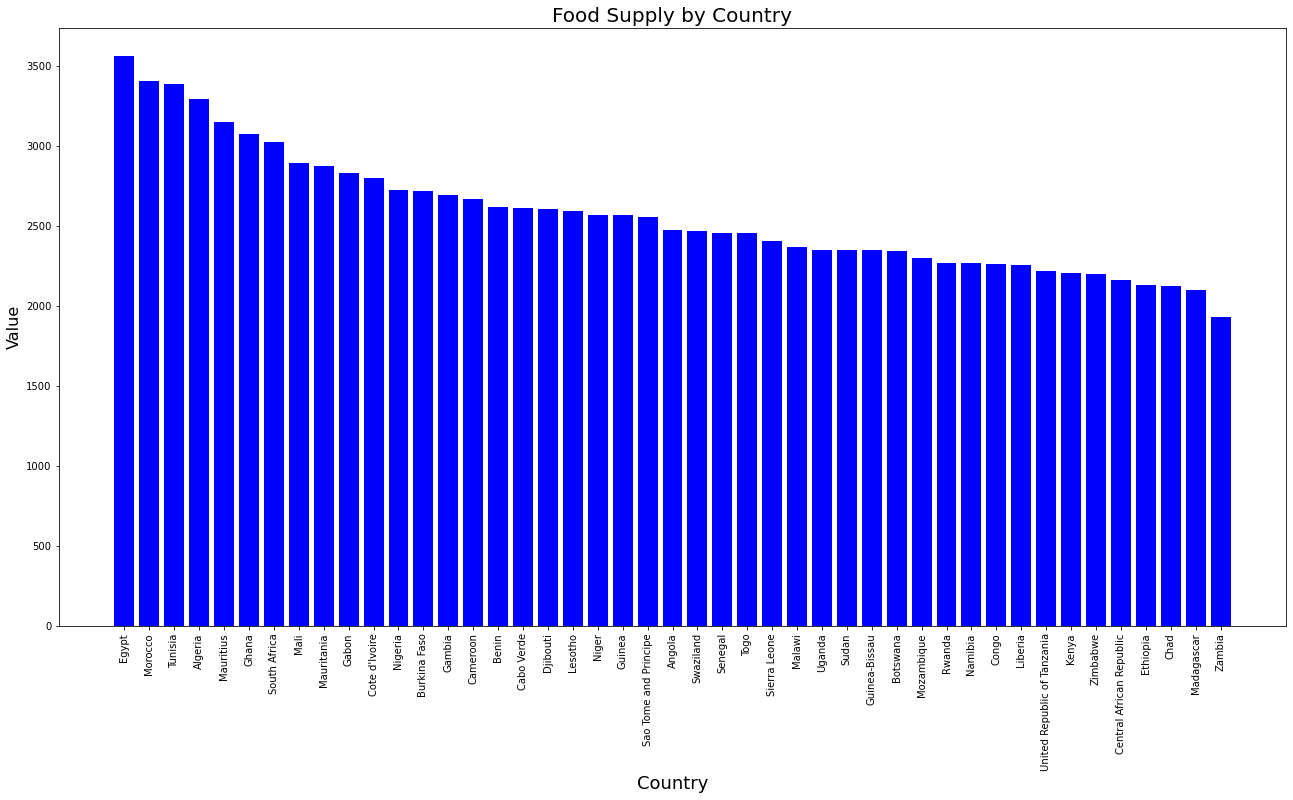

In [32]:
#We will use a bar chart to show the value of by country to know the heightest consuming country, figsize is set to(22,11)
fig= plt.figure(figsize=(22, 11))
plt.bar(food_supply_sorted_desc['Country'],food_supply_sorted_desc['Value'],color='blue')
plt.title('Food Supply by Country', fontsize= 20)
plt.xlabel('Country', fontsize= 18)
plt.ylabel('Value', fontsize= 16)
plt.xticks(rotation=90)
plt.show()
fig.savefig('Average Food Supply by Country.jpg')

Egypt, Morocco and Tunisia are the top tree countries with the highest food consumption

Checking for unique values in the datasets

In [34]:
food_prod.nunique()

Country      45
Item         94
Year         10
Value      2134
Unit          1
dtype: int64

In [35]:
food_supply.nunique()

Country     45
Year        10
Value      373
Unit         1
dtype: int64

In [36]:
# grouping by country, year and item to get the total production per item using the groupby() method

food_prod_sum = food_prod.groupby(['Country', 'Year', 'Item'])['Value'].sum()
food_prod_sum

Country   Year        Item                 
Algeria   2004-01-01  Apples and products       165
                      Bananas                     0
                      Barley and products      1212
                      Beans                       2
                      Beer                      110
                                               ... 
Zimbabwe  2013-01-01  Tea (including mate)       19
                      Tomatoes and products      24
                      Vegetables, Other         203
                      Wheat and products         25
                      Wine                        2
Name: Value, Length: 23110, dtype: int64

In [37]:
# Total values of food production for each year
food_prod_tot = pd.DataFrame(food_prod.groupby(['Country', 'Year'], as_index= False)['Value'].sum())
food_prod_tot

Country       Year  Value
0     Algeria 2004-01-01  15536
1     Algeria 2005-01-01  15667
2     Algeria 2006-01-01  16417
3     Algeria 2007-01-01  14763
4     Algeria 2008-01-01  13841
..        ...        ...    ...
445  Zimbabwe 2009-01-01   5754
446  Zimbabwe 2010-01-01   6777
447  Zimbabwe 2011-01-01   7551
448  Zimbabwe 2012-01-01   8173
449  Zimbabwe 2013-01-01   7914

[450 rows x 3 columns]

In [39]:
# Sorting by total values in descending order
foodprod_grouped = food_prod_tot.sort_values(by = 'Value', ascending=False)

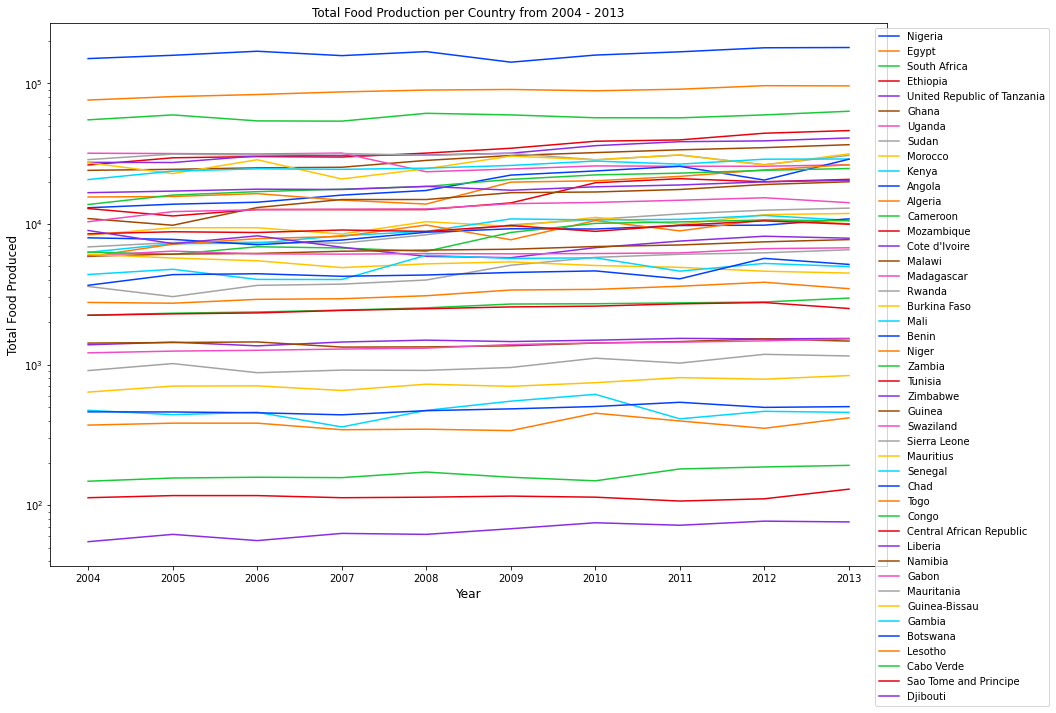

In [42]:
# Line chart of trend from 2004 - 2013 of total items produced per country
plt.subplots(figsize=(15,10))
lineplt = sns.lineplot(x=foodprod_grouped['Year'], y= foodprod_grouped['Value'], hue=foodprod_grouped['Country'], palette = 'bright', data=foodprod_grouped, ci=None )
lineplt.set_yscale('log')
lineplt.legend(loc='upper right',bbox_to_anchor= (1.2, 1))

# Defining the title of the plot, xaxis and yaxis.
plt.title('Total Food Production per Country from 2004 - 2013')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Total Food Produced', fontsize = 12);

From the line plot above, Nigeria, Egypt and South Africa has consistently, been the top 3 countries with the highest food production

In [43]:
# grouping by country, year and item to get the total supply per item
food_supply_tot = pd.DataFrame(food_supply.groupby(['Country', 'Year'], as_index= False)['Value'].sum())
food_supply_tot

Country       Year  Value
0     Algeria 2004-01-01   2987
1     Algeria 2005-01-01   2958
2     Algeria 2006-01-01   3047
3     Algeria 2007-01-01   3041
4     Algeria 2008-01-01   3048
..        ...        ...    ...
445  Zimbabwe 2009-01-01   2147
446  Zimbabwe 2010-01-01   2168
447  Zimbabwe 2011-01-01   2200
448  Zimbabwe 2012-01-01   2197
449  Zimbabwe 2013-01-01   2110

[450 rows x 3 columns]

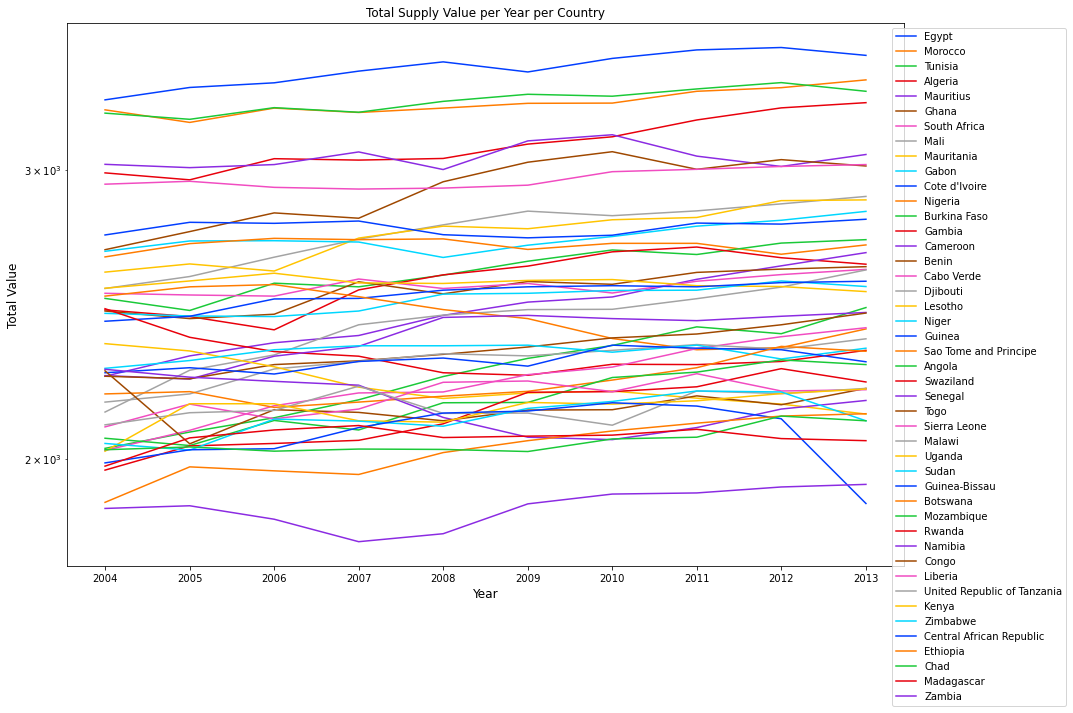

In [44]:
# Sorting by total values supplied in descending order
foodsupply_sorted = food_supply_tot.sort_values(by='Value', ascending=False)

# Visualising from 2004 - 2013 of total items supplied to each country
plt.subplots(figsize=(15,10))
lineplt1 = sns.lineplot(x=foodsupply_sorted['Year'], y= foodsupply_sorted['Value'], hue=foodsupply_sorted['Country'], palette = 'bright', data=foodsupply_sorted, ci=None )
lineplt1.set_yscale('log')
lineplt1.legend(loc='upper right',bbox_to_anchor= (1.2, 1))

# Defining the title of the plot, xaxis and yaxis.
plt.title('Total Supply Value per Year per Country')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Total Value', fontsize = 12);

The line chart above shows that Egypt, Morocco and Tunisia has the highest food supply per capital. And Only Egypt, out of the top 3 countries with the highest production is one of the highest suppliers

## Finding outliers

In [45]:
#Creating a boxplot for the food production data 
fig = go.Figure()
fig.add_trace(go.Box(y = foodprod_grouped.Value,
                     x= foodprod_grouped.Year,
                     boxpoints = "outliers",
                     boxmean = True,
                     marker_color='rgb(9,56,125)',
                     line_color='rgb(9,56,125)'))
fig.update_layout(title_text="Food Production per Country from 2004-2013", yaxis_title= "Total Food Produced", xaxis_title = "Year")
fig.show()

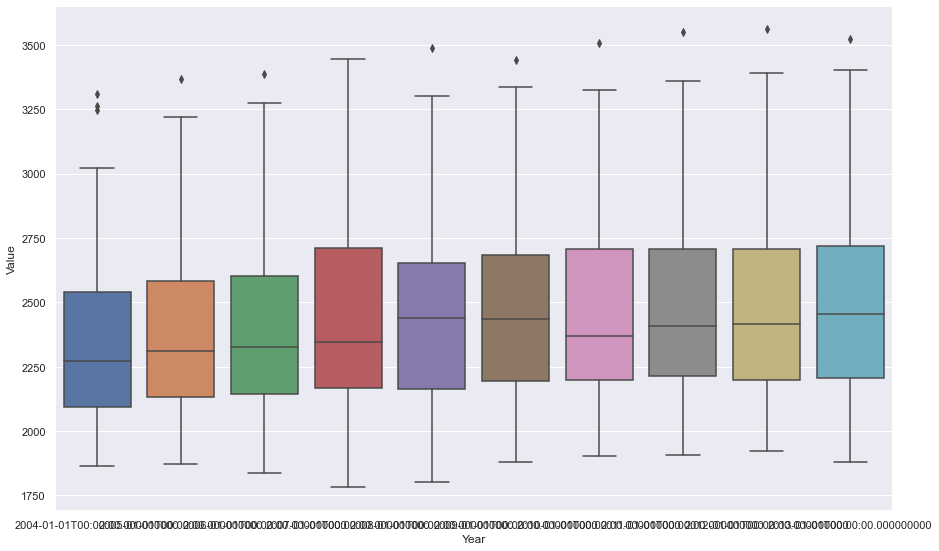

In [47]:
#Ploting box plot for food supply dataset
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(15,9.27)}) 
sns_plot = sns.boxplot(x = 'Year', y = 'Value', data = food_supply)
fig = sns_plot.get_figure()
plt.show()
fig.savefig('supply_outliers.jpg')

From the above box plot, there are a few outliers in the food supply dataset

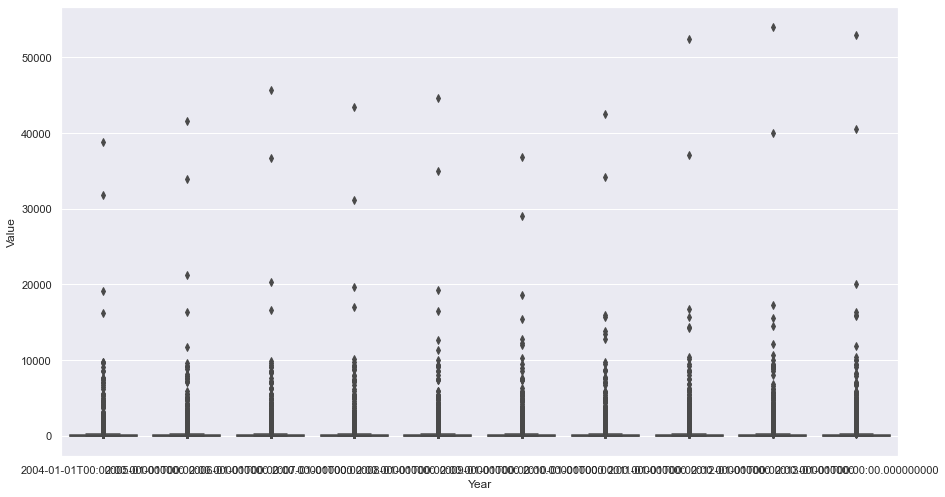

In [49]:
#box plot for food production dataset
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(15,8.27)}) 
sns_plot = sns.boxplot(x = 'Year', y = 'Value', data = food_prod)
fig = sns_plot.get_figure()
plt.show()
fig.savefig('produce_outliers.jpg')

From the above box plot, there are many outliers in the food production dataset

#### Calculating the 25th percentile, 75th percentile and the interquartile range IQR

In [51]:
#25th percentile Q1
Q1= np.percentile(food_prod['Value'],25)
print(f"The Q1 value for food production data is {Q1}")

#75th percentile Q3
Q3= np.percentile(food_prod['Value'],75)
print(f"The Q3 value for food production data is {Q3}")

#Calculating the IQR
IQR= Q3-Q1
print(f"The IQR for food production data is {IQR}")

The Q1 value for food production data is 3.0
The Q3 value for food production data is 108.0
The IQR for food production data is 105.0


### calculating lower bound and upper bound values

In [52]:
lower_bound= Q1 - (1.5 * IQR)
print(f"lower_bound value for food production data is {lower_bound}")

upper_bound= Q3 + (1.5 * IQR)
print(f"upper_bound value for food production data is {upper_bound}")

lower_bound value for food production data is -154.5
upper_bound value for food production data is 265.5


From the plot, the most produced item is cassava, It would be important to note the countries that produce the most cassava

In [55]:
cassava_production = food_prod[(food_prod["Item"] == "Cassava")]

#top 10 countries that produce cassava
cassava_production = cassava_production.groupby('Country')['Value'].mean()
cassava_production = cassava_production.to_frame(name='value').reset_index()
cassava_production_sort = cassava_production.sort_values(['value'], ascending=[False])
cassava_production_sort = cassava_production_sort.head(10)

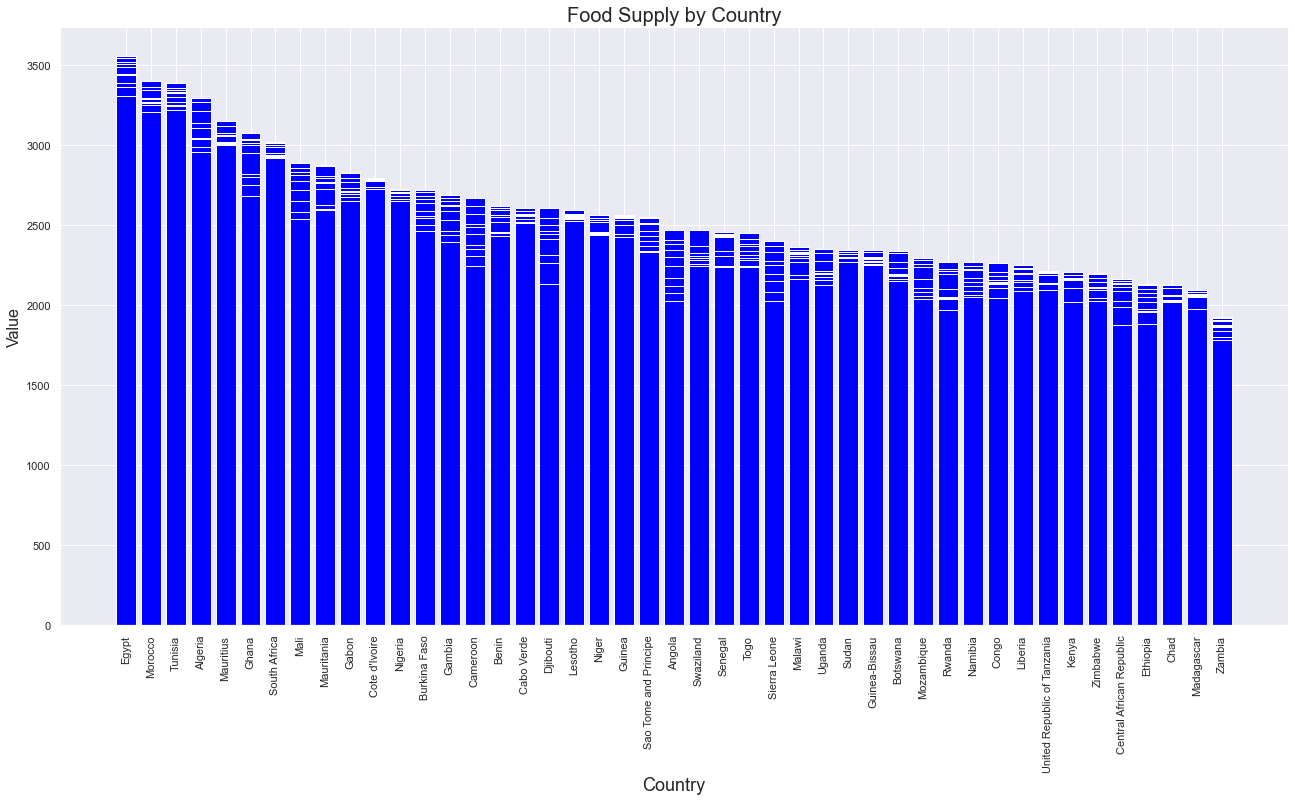

In [56]:
fig= plt.figure(figsize=(22, 11))
fig.savefig('Average Food Supply by Country.png')
plt.bar(food_supply_sorted_desc['Country'],food_supply_sorted_desc['Value'],color='blue')
plt.title('Food Supply by Country', fontsize= 20)
plt.xlabel('Country', fontsize= 18)
plt.ylabel('Value', fontsize= 16)
plt.xticks(rotation=90)
plt.show()


## Comparison between average food consumption and production for each year.

In [57]:
#average food production for each year
food_production_avg=pd.DataFrame(food_prod.groupby('Year')['Value'].mean()).reset_index(inplace= False)
food_production_avg

Year       Value
0 2004-01-01  286.767301
1 2005-01-01  298.986592
2 2006-01-01  310.814014
3 2007-01-01  305.215830
4 2008-01-01  318.686851
5 2009-01-01  323.040657
6 2010-01-01  340.166955
7 2011-01-01  351.303633
8 2012-01-01  364.831816
9 2013-01-01  378.227568

In [58]:
#average food supply for each year
food_supply_avg=pd.DataFrame(food_supply.groupby('Year')['Value'].mean()).reset_index(inplace= False)
food_supply_avg

Year        Value
0 2004-01-01  2394.222222
1 2005-01-01  2409.288889
2 2006-01-01  2430.800000
3 2007-01-01  2447.755556
4 2008-01-01  2460.755556
5 2009-01-01  2482.222222
6 2010-01-01  2497.400000
7 2011-01-01  2515.422222
8 2012-01-01  2527.644444
9 2013-01-01  2532.244444

In [59]:
#merging of the two dataframes
prod_supp_avg_df = pd.merge(food_production_avg, food_supply_avg, on='Year')
prod_supp_avg_df

Year     Value_x      Value_y
0 2004-01-01  286.767301  2394.222222
1 2005-01-01  298.986592  2409.288889
2 2006-01-01  310.814014  2430.800000
3 2007-01-01  305.215830  2447.755556
4 2008-01-01  318.686851  2460.755556
5 2009-01-01  323.040657  2482.222222
6 2010-01-01  340.166955  2497.400000
7 2011-01-01  351.303633  2515.422222
8 2012-01-01  364.831816  2527.644444
9 2013-01-01  378.227568  2532.244444

In [60]:
#renaming the columns 
prod_supp_avg_df.rename(columns= {'Value_x':'avg_food_produced', 'Value_y':'avg_food_supplied'}, inplace = True)

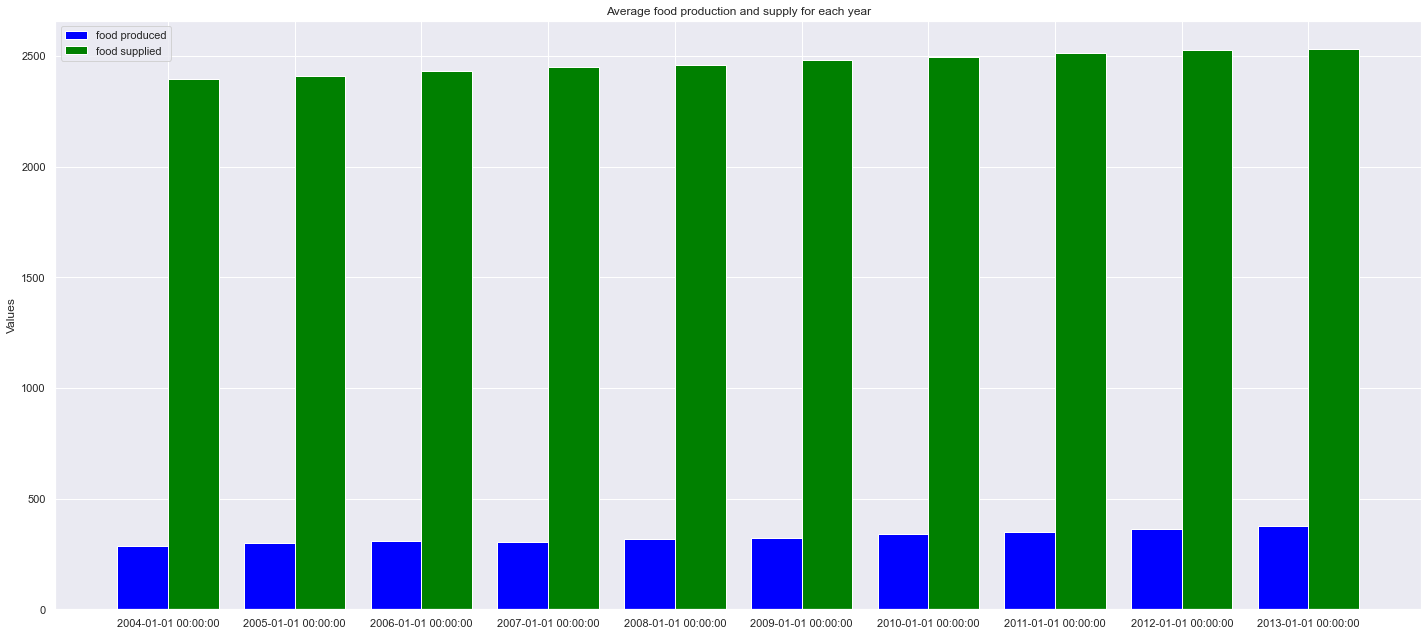

In [64]:
# setting year location and the width of the bars
fig= plt.figure(figsize=(20,9))
fig.savefig('Comparison of Food Production and Supply.jpg')
x = np.arange(len(prod_supp_avg_df['Year']))  
width = 0.40 

ax = fig.add_subplot()
rects1 = ax.bar(x - width/2, prod_supp_avg_df['avg_food_produced'], width, label='food produced', color='blue')
rects2 = ax.bar(x + width/2, prod_supp_avg_df['avg_food_supplied'], width, label='food supplied', color='green')

ax.set_ylabel('Values')
ax.set_title('Average food production and supply for each year')
ax.set_xticks(x)
ax.set_xticklabels(prod_supp_avg_df['Year'])
ax.legend()

fig.tight_layout()

plt.show()
